# HMS - Harmful Brain Activity Classificationの探索的データ分析

**1. 本コンペの目的**・・・脳波 (EEG) データから発作（seizures）やその他の種類の有害な脳活動を検出して分類する。

**2. eegとは？**  
・・・一般にEEGと呼ばれる脳波検査のことで、脳内の電気活動を記録するために使用される非侵襲的な方法である。頭皮に電極を配置し、脳細胞の活動から生じる微小な電気信号（静止電位＝－70ミリボルト）を検出する。 電極によって捕捉された信号は増幅されて記録され、通常は一連の波線が生成された後、専門家によって分析される。電極は 10-20 システムに基づいて配置される。これは、頭蓋骨を 10% または 20% の増分に分割して電極を配置するシステムである。各電極の番号とラベルは位置に基づいている。  
 
**脳波の主な周波数帯域**  
デルタ波（Delta waves）: 約0.5〜4ヘルツ：深い睡眠時に観察される。  
シータ波（Theta waves）: 約4〜8ヘルツ：リラックスした状態、または睡眠時に見られる。  
アルファ波（Alpha waves）: 約8〜13ヘルツ：目を閉じてリラックスした状態で観察される。  
ベータ波（Beta waves）: 約13〜30ヘルツ：目を開けて活動的な状態で見られる。  
ガンマ波（Gamma waves）: 約30ヘルツ以上：高度な認知機能と関連している。  

**3. 脳波の種類**
  * 発作 (SZ)
  * 一般化周期放電 (GPD)
  * 側方周期放電 (LPD)
  * 側性リズミカルデルタ活動 (LRDA)
  * 一般化リズミカルデルタ活動 (GRDA)  
  
※詳細は[こちら](https://www.acns.org/UserFiles/file/ACNSStandardizedCriticalCareEEGTerminology_rev2021.pdf)を参照してください。
  

**4.観察される脳波データの主な特徴**  

* 波形・・・EEG データは、アルファ波、ベータ波、デルタ波、シータ波など、さまざまなタイプの波形パターンによって特徴付けられる。それぞれのタイプは異なる脳の状態に対応する。 たとえば、アルファ波はリラックス状態と関連付けられることが多く、ベータ波は活動的な思考や集中力と関連付けられる。  
 
* 振幅と周波数:・・・波の振幅 (高さ) と周波数 (速度) は異なる。 振幅は信号の強度を示し、周波数は脳波の振動速度を示す。  
* アーティファクト・・・ 筋肉の動き、まばたき、または電気的干渉によってデータに現れる可能性のある脳以外の波形。  
* 異常なパターン・・・ てんかんなどの神経障害の場合、EEG には異常な脳活動を示すスパイク、鋭い波、またはその他の異常なパターンが表示されることがある。

**5.スペクトログラム（spectrogram）とは？**  
・・・一般的にスペクトログラムとは、電極から得られた電気信号に対して、短い時間窓で区切ったうえで短時間フーリエ変換（STFT: Short-Time Fourier Transform）を適用して得られる三次元（時間、周波数、パワースペクトル密度）の情報を持ったデータのことである。つまり、datasetのspectrogramファイルはすべてeegデータのフーリエ変換後の情報である。下図の色で囲まれた枠内の電極からのデータで、計4つのスペクトログラム（LL、LP、RP、RR）の作成ができる。  
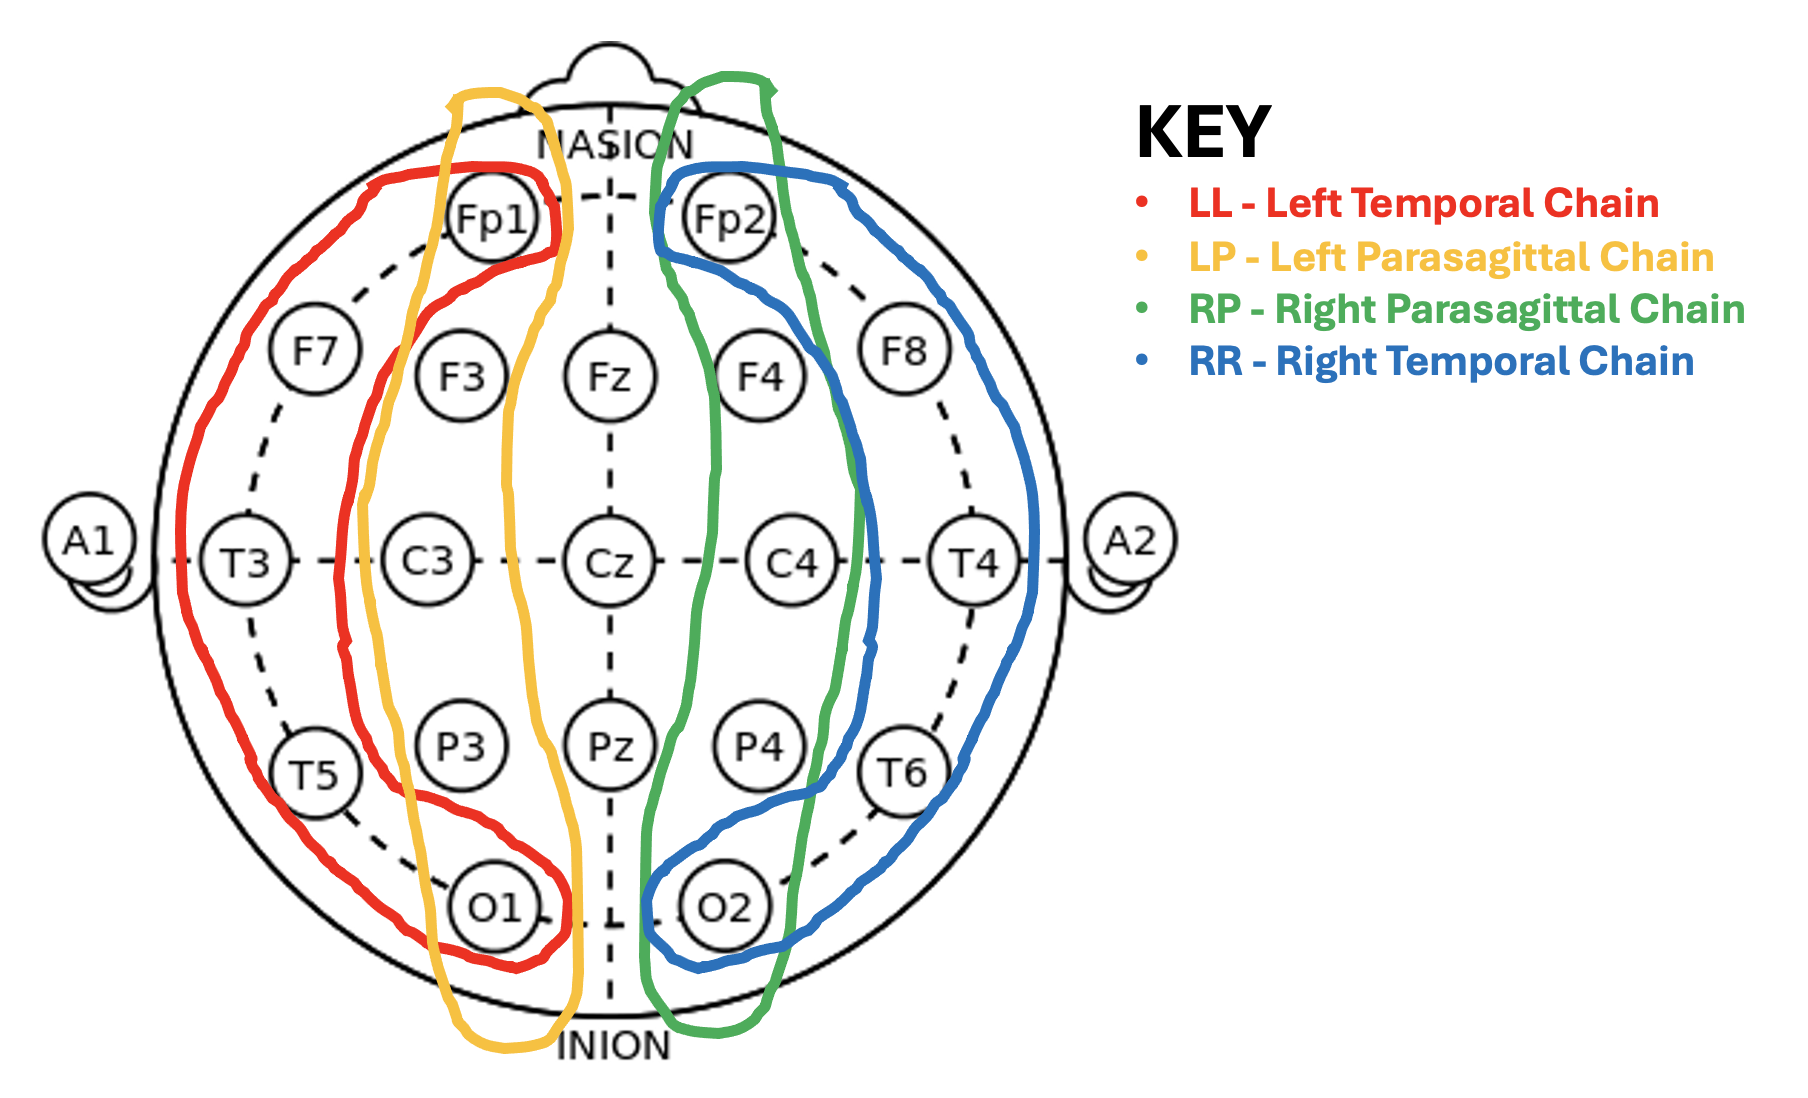 

**6.spectrogramはどのようにして脳波の解析に役立つのか？**  

* 周波数の解析・・・EEG 信号は、アルファ波、ベータ波、シータ波、デルタ波など、さまざまな周波数の脳波で構成される。spectrogramはこの周波数を視覚的にとらえ、時間の経過とともに脳波がどのように変化するかを示すことができる。
* 脳波パターンの識別・・・spectrogramは脳波データでは捉えられない可能性のあるパターンの識別に役立つ。例えば、睡眠段階中の脳活動の変化、てんかんなどの特定の神経疾患に関連する振動活動などを特定するために用いられる。  
* 時間と周波数の二次元での解析・・・spectrogramの主な利点は、信号やデータの周波数成分を時間的な変化として視覚的に捉えることができる点で、これは、脳活動の動的な変化を理解するために非常に重要である。spectrogramの可視化はこの動的な変化を直感的に理解できる利点がある。また、色でパワースペクトル密度を表現している。

ここでは、数多くの素晴らしいnotebook（discussion）から得られた知見と、自分の気になった部分のEDAを掛け合わせています。  
このnotebookが他の方の役に立てれば幸いです。役に立ったと思ったら、upvoteして頂ければとても励みになります。  
初学者ですので、解釈の間違いが含まれているかもしれません。もし間違いに気づいたらコメントでご指摘いただければとてもありがたいです。 

参考Notebooks,Discussions：  
* [🧠HMS: dataset analysis & XGBoost classification](https://www.kaggle.com/code/andradaolteanu/hms-dataset-analysis-xgboost-classification)
* [🌩️HMS - EDA and Domain Journey🌍](https://www.kaggle.com/code/mvvppp/hms-eda-and-domain-journey)   
* [Understanding Competition Data and EfficientNetB2 Starter - LB 0.43 🎉](https://www.kaggle.com/competitions/hms-harmful-brain-activity-classification/discussion/468010)  
* [How To Make Spectrogram from EEG](https://www.kaggle.com/code/cdeotte/how-to-make-spectrogram-from-eeg#Exciting-UPDATE!)

# データ構造の概要  
**train.csv**  
* eeg_id・・・脳波データの識別子。  
* eeg_sub_id・・・脳波データのサブid。（特に大きな意味を持たないようです。）  
* eeg_label_offset_seconds・・・eeg parquetファイルのどの時間からの観測かを指す。  
* spectrogram_id・・・スペクトログラムの識別子。  
* spectrogram_sub_id・・・スペクトログラムのサブid。（同様に大きな意味を持たないようです。）  
* spectogram_label_offset_seconds・・・spetrogram parqueetファイルのどの時間からの観測に当たるのかを指す。  
* label_id・・・行ごとの識別子。（これも情報としては無視してかまわないと思われます。）  
* patient_id・・・患者の識別子。
* expert_consensus・・・各観測（行）における専門家の投票が多かった脳波の種類。
* [seizure/lpd/gpd/lrda/grda/other]_vote・・・脳波の種別ごとの専門家の投票数。    

※専門家の投票数は各行によって異なるので注意が必要です。これは同じeeg_idを持つデータ同士に対しても同様です。

**test.csv**  
* eeg_id
* spectrogram_id
* patient_id  

**sample_submission.csv**  
* eeg_id
* [seizure/lpd/gpd/lrda/grda/other]_vote   
 
**train_eegs/*.parquet**  
* eeg_idごとのparquetファイル。列には脳波を計測するための電極の名前が入っている。（EKGだけは心電図のデータ）毎秒200サンプルの頻度で収集されている。  

**test_eegs/*.parquet**  
* 50秒間の脳波データが入っている。  

**train_spectrograms/*.parquet**  
* スペクトログラムidごとのparquetファイル。列名にはスペクトログラムの領域と周波数が与えられ、各要素はパワースペクトル密度を示す。

**データの理解**  
train.csvデータにはeeg_id,spextrogram_id,patient_idと識別子が複数格納されていて、106,800行のデータに対してそれぞれ一意の値の数はeeg idが17089個、spectrogram idが11138個、patient idが1950個である。  
これは、特定の一人の患者から得られた脳波データに対して任意の時間幅(50秒)を一つの観測対象として定め、各行は脳波データ内で異なる開始時間からの観測結果として格納されていると考えられる。観測の開始時間に当たるのがeeg(spectrogram)_label_offset_seconds。

**補足：**  
datasetには、全てのeeg_id,spectrogram_idに対応するparquetファイルが与えられている。  
※脳波データに関しては識別子よりもファイルの数のほうが多いですが、特に問題はないと思います。（後述で確認しています。）  
  
# データ構造
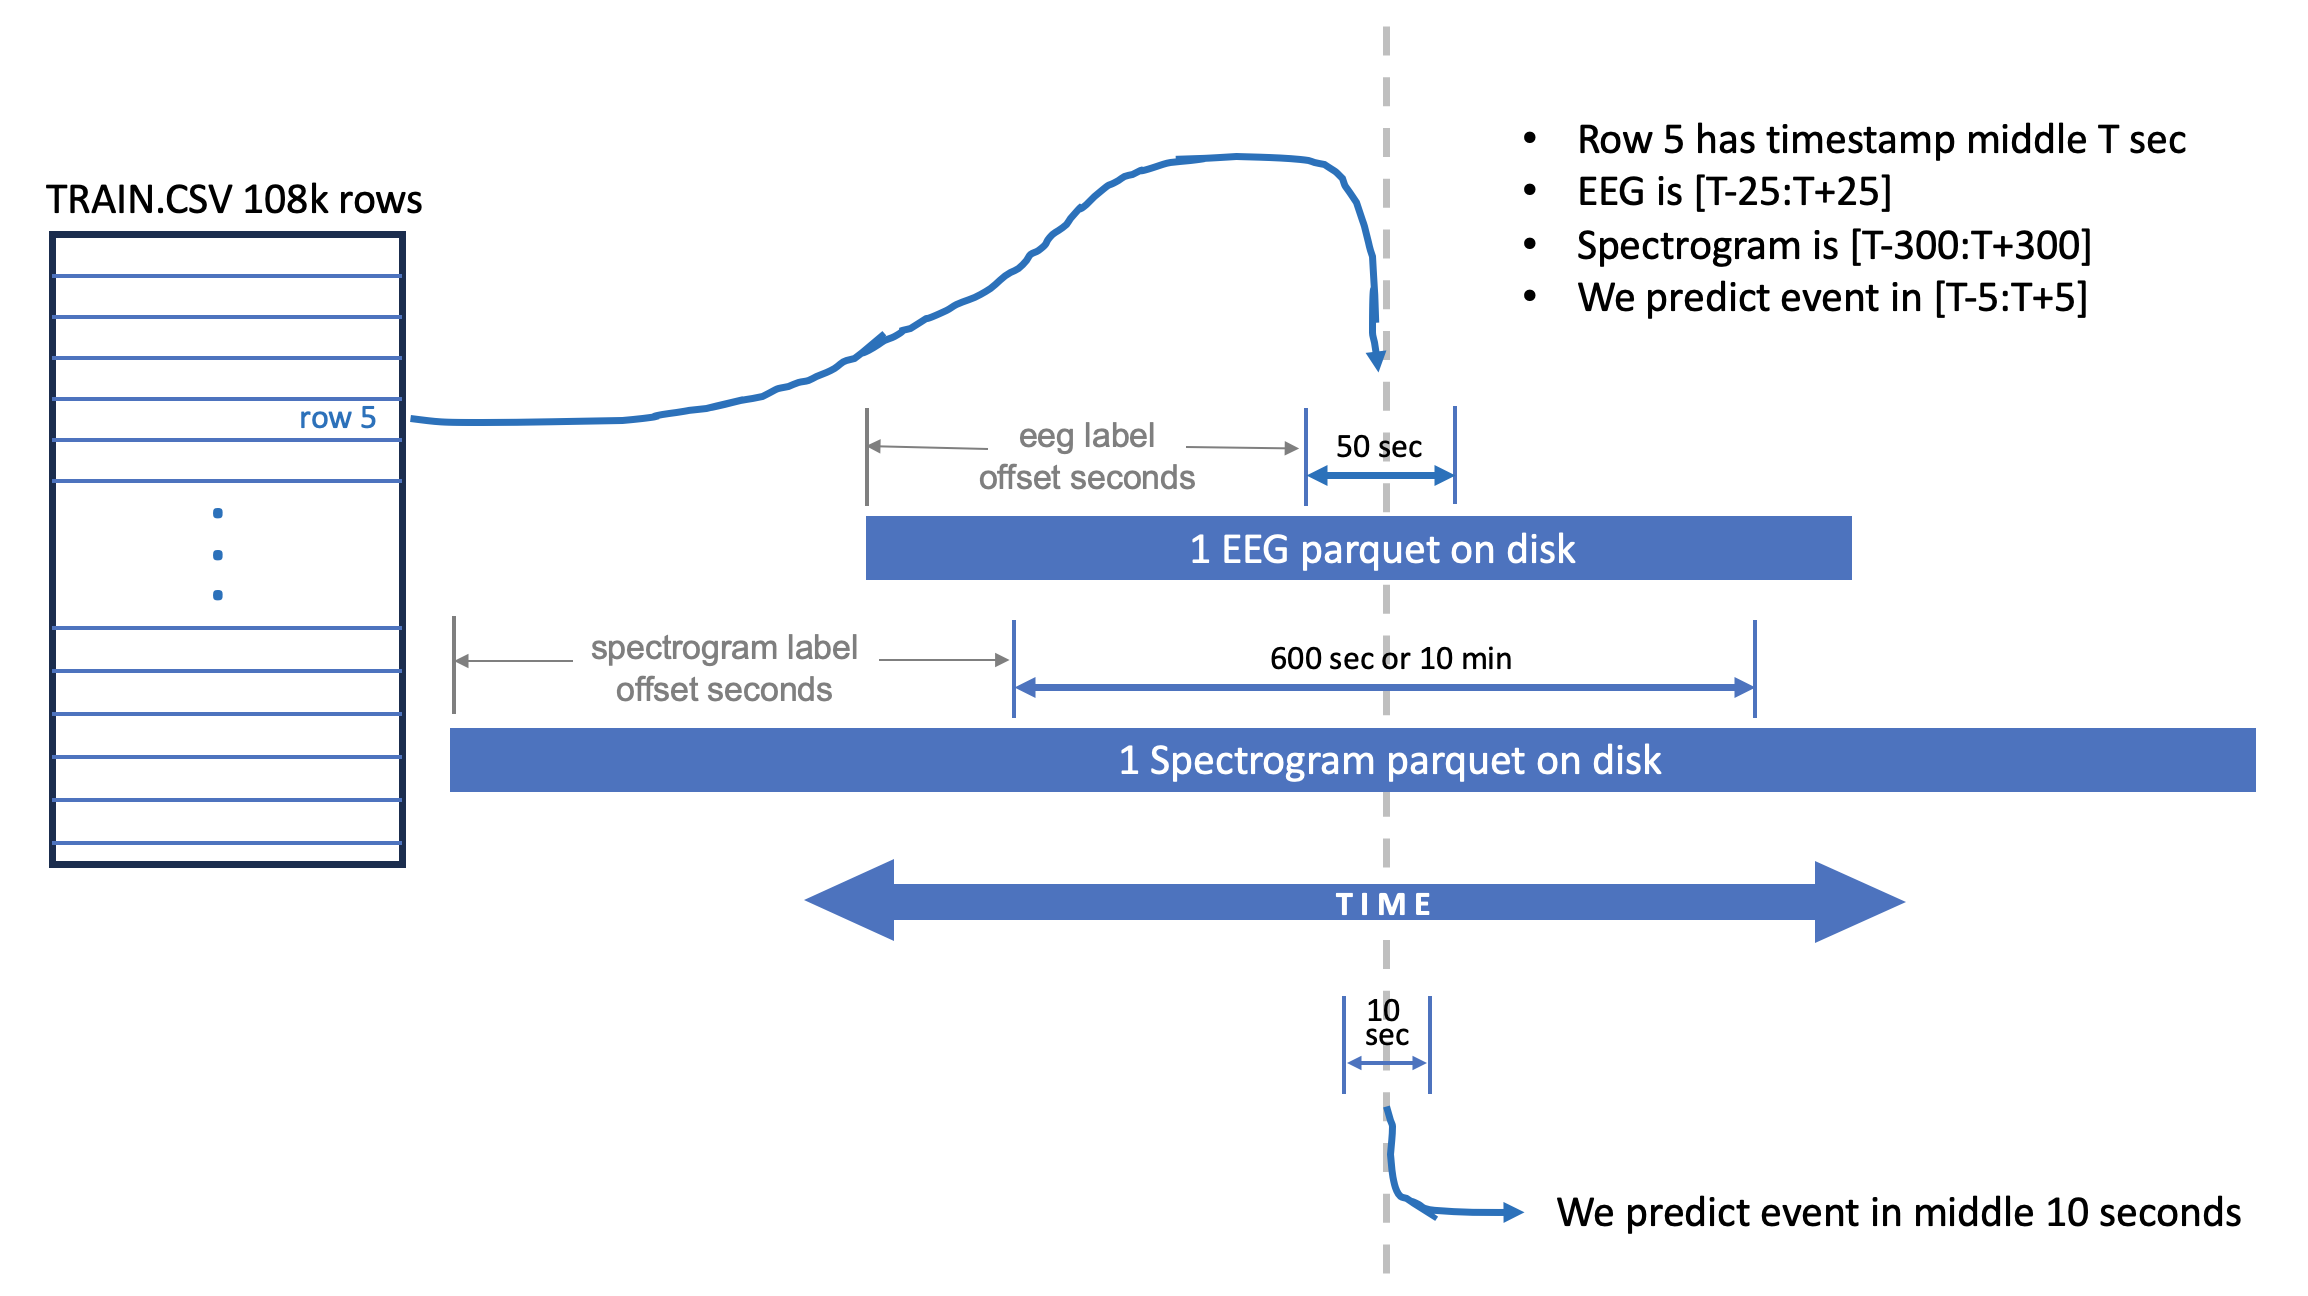

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mlp
import seaborn as sns

import os
import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

from tqdm import tqdm 
import glob

In [ ]:
# train_eegs paqruet filesの数と容量確認

print("Train eeg files: ")
! ls /kaggle/input/hms-harmful-brain-activity-classification/train_eegs | wc -l
print("Size of train eegs")
! du -sh /kaggle/input/hms-harmful-brain-activity-classification/train_eegs

# train spectrogram parquet filesの数と容量の確認

print("Train spectrogram files: ")
! ls /kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms | wc -l
print("Size of train spectrograms")
! du -sh /kaggle/input/hms-harmful-brain-activity-classification/train_spectrograms

**データフレームの作成**  

In [ ]:
Directory = '/kaggle/input/hms-harmful-brain-activity-classification'

# train、submission、testの読み込み
train_df = pd.read_csv(os.path.join(Directory, 'train.csv'))
submission_df = pd.read_csv(os.path.join(Directory, 'sample_submission.csv'))
test_df = pd.read_csv(os.path.join(Directory, 'test.csv'))

In [ ]:
train_df.head(2)

In [ ]:
# sample_submissiom 確認
sample_sub = pd.read_csv(os.path.join(Directory, 'sample_submission.csv'))
sample_sub.head(2)

In [ ]:
#　train_dfの基本的な情報の取得

print(train_df.nunique())                             # train_dfの各列のユニークな値の総数
print('\n' + f'train shape is : {train_df.shape}')    # train_dfの形状
print('\n', train_df.isnull().sum())                  # train_dfの欠損値の数
print('\n', train_df.dtypes)                          # train_dfの型

# 投票に関する列の基本的な統計量を確認する
cols = [col for col in train_df.columns if '_vote' in col]
print('\n', train_df[cols].describe())

* 欠損値はどの列もない。  
* ユニークな値の数より1950人の患者から脳波データを観測し観測対象を時間窓（50秒）で切り取り、切り取られた対象の真ん中の10秒に対する予測結果をexpert_consesus（多数決）と種別の専門家の投票数として保存していると考えられる。  
* 「真ん中10秒に対する予測」は、コンペの詳細に書かれていた内容です。  

※個人的な疑問点で、「脳波データのidが17089個なら、脳波データをもとに作られるスペクトログラムもユニークな値は同じ個数になるのではないか？」と考えたのですが、おそらく一意の患者から得られた連続した脳波データでも複数のeeg_idを持ち、かつスペクトログラムは各eeg_idの観測時間よりも長い時間の観測結果をもとに作られている為、spectrogram_idの方が少ないのだと思います。

In [ ]:
# expert_consensusが各観測における投票数の多数決によって決まることを確認

# 各行の最大値を持つ列を返す関数の定義
def max_column_name(row):
    max_column = row.idxmax()
    return max_column[:-5]

df = train_df.copy()     # train_dfのコピー

# 新しい列を作成
cols = [col for col in train_df.columns if '_vote' in col]
df['max_column'] = df[cols].apply(max_column_name, axis=1)
# expert_consensusの表記に合わせる
col_dict = {'seizure':'Seizure', 'gpd':'GPD', 'lrda':'LRDA', 'grda':'GRDA', 'lpd':'LPD', 'other':'Other'}
df['max_column'] = df['max_column'].map(col_dict)

# max_columnとexpert_consensusが一致する行のみ抽出して、行数が元のdfと合致すればprint()出力
if train_df.shape[0] == df[(df['max_column'] == df['expert_consensus'])].shape[0]:
    print('expert_consensus is a majority vote.')
# 行数一致しない場合、max_columnとexpert_consensusの一致していない行を出力
else:
    print(df[(df['max_column'] != df['expert_consensus'])])

In [ ]:
def show_values_on_bars(axs, h_v="v", space=0.4):
    '''Plots the value at the end of the a seaborn barplot.
    axs: the ax of the plot
    h_v: weather or not the barplot is vertical/ horizontal'''
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

In [ ]:
#　各taregt列の投票数の推移をプロット

fig, ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()
target_cols = [col for col in train_df.columns if '_vote' in col]

for i in range(6):
    df = train_df[target_cols[i]].value_counts(ascending=False).reset_index()
    df.columns = ['Num_of_vote', 'frequency']
    df = df.sort_values(by='Num_of_vote')
    sns.barplot(data=df, y='frequency', x='Num_of_vote', ax=ax[i])
    show_values_on_bars(ax[i], h_v="v", space=0.4)
    ax[i].set_title(f'{target_cols[i]} - Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# expert_consensusの分布の可視化

dt = train_df.expert_consensus.value_counts().reset_index()    # 脳波ごとに要素数をカウント
dt.columns = ["consensus", "frequency"]

#cols = [col for col in train_df.columns if '_vote' in col]
sum_val = train_df[cols].sum().sort_values(ascending=False).reset_index()    # 投票数の合計を集計
sum_val.columns=['target', 'vote']


# expert_consensus の分布をプロット
plt.figure(figsize=(20, 5))
figure1 = sns.barplot(data=dt, x="consensus", y="frequency")
show_values_on_bars(figure1, h_v="v", space=0.4)
plt.title('[train] Expert Consensus - Frequency', weight="bold", size=20)
plt.xlabel("Consensus", size=18, weight="bold")
plt.ylabel("Count", size=18, weight="bold")
sns.despine(right=True, top=True, left=True)

# グラフを別に作成して sum_val をプロット
plt.figure(figsize=(20, 5))
figure2 = sns.barplot(data=sum_val, x='target', y='vote')
show_values_on_bars(figure2, h_v="v", space=0.4)
plt.title('[train] Sum of Vote', weight="bold", size=20)
plt.xlabel("Target", size=18, weight="bold")
plt.ylabel("Vote", size=18, weight="bold")
plt.xticks(rotation=0)
plt.legend()
plt.show()

* expert_consensusの分布は比較的均一である。  
* expert_consensusではSeizure（発作）が最も多い結果だが、全体の投票数の数では最も低い値を示している。またother_voteの投票数が非常に多いため、専門家でも意見が割れたり判断が難しい事例が散見されることがわかる。

In [ ]:
# offset_secondsの分布の可視化

fig,ax = plt.subplots(1,2,figsize=(20,6))

ax[0].hist(train_df['eeg_label_offset_seconds'], bins='auto', log=True)
ax[0].set_xlabel('Offset Seconds')
ax[0].set_ylabel('Frequency (Log Scale)')
ax[0].set_title('Histogram of EEG Offset Seconds (Log Scale)')

ax[1].hist(train_df['spectrogram_label_offset_seconds'], bins='auto', log=True)
ax[1].set_xlabel('Offset Seconds')
ax[1].set_ylabel('Frequency (Log Scale)')
ax[1].set_title('Histogram of Spectrogram Offset Seconds (Log Scale)')

plt.show()

* グラフより、offset_secondsは値が大きくなるほどサンプル数が減る。＝＞eeg_id(spectrogram_id)ごとに観測時間の違いがある。  
* 横軸の値の幅を見てわかるように、やはりspectrogramの方が観測時間が長いようだ。  

※対数化により、縦軸の値の幅は狭められています。

In [ ]:
# 一意のeeg_id内でexpert_consensusが異なる場合がいくつか存在することの確認

# eeg_idでグルーピングして各idにおけるexpert_consensusのユニーク数を集計
df = train_df.groupby(['eeg_id'])['expert_consensus'].nunique()

df_ = df[df >=  2].reset_index()    # ユニーク数2以上のeeg_idだけ抽出

# 複数の結論を持つidの比率と数を出力
print('Num of ids with multi consensus : ', df_.shape[0])
num_eeg_ids = train_df['eeg_id'].nunique()
print(f'multi consensus ids ratio : {df_.shape[0] / num_eeg_ids * 100} %')

# train_dfから、上記の条件に当てはまる任意のeeg_idのデータフレームを確認
random_eeg = df_['eeg_id'].iloc[np.random.randint(0,df_.shape[0])]
train_df[train_df['eeg_id']== random_eeg]


# 一意のspectrogram_id内でexpert_consensusが異なる場合がいくつか存在することを確認

# data = train_df.groupby(['spectrogram_id'])['expert_consensus'].nunique()
# sepc_id_multi_cons = data[data>=2].index.to_list()
# # 条件抽出したspectrogram_idからランダムに一つ選んでデータフレームを確認
# train_df[train_df.spectrogram_id == sepc_id_multi_cons[np.random.randint(0,len(sepc_id_multi_cons))]]

* 約95％は一つのeeg_idに対して一つのconsensusが対応している。  
※もしかしたら、この特徴がコンペの後半でモデルの予測精度のわずかな向上につながるかもしれません。例えば、multi_consensusを持つということは予測の難しさに起因すると思われるので、特徴量にフラグを追加するなどで他のデータとの差別化が行われるかもしれません。  

※sample_submssion_dfを見るに、データのグルーピングはeeg_idで行うのが良さそうなので、spectrogram_idでの分析は省略してます。

In [ ]:
# descriptionに書いてあるように、観測結果の投票の割れ方に応じてデータのパターンを分割して新しい列「pattern」を作る

target_cols = [col for col in train_df.columns if '_vote' in col]
train_group = train_df.groupby('eeg_id')[target_cols].sum().reset_index()

def categorize_votes(row):    # row:行
    # 投票数の最大値と合計を計算
    col_names = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
    max_vote = row[col_names].max()
    total_votes = row[col_names].sum()
    second_opinion = row[col_names[:-1]].sort_values(ascending=False).to_list()[1]

    # expert_consensusへの投票率を計算
    percentage = max_vote / total_votes * 100
    second_percentage = second_opinion / total_votes * 100

    high_agreement_threshold = 70
    equal_splitting_threshold = 40

    # expert_consensusへの投票率70％の時
    if percentage >= high_agreement_threshold:    
        return 'idealized'
    # expert_consensusへの投票率40%以上かつ「other」への投票率も40％超えるとき
    elif row['other_vote'] / total_votes >= 0.4 and percentage >= equal_splitting_threshold:
        return 'proto'
    # 「expert_consesnsu、other」以外の一意の脳波への投票が40%以上，かつexpert_consensusへの投票率が40％超えるとき
    elif second_percentage >= equal_splitting_threshold and percentage >= equal_splitting_threshold:
        return 'edge'
    # それ以外（専門家による見解にかなりの相違がみられる場合）
    else:
        return 'undecided'

# 「pattern」列作成（生データでは各行の投票数少ないため、eeg_idでグルーピングしたデータフレームに追加する）
train_group['pattern'] = train_group.apply(categorize_votes, axis=1)

# patternの分布の可視化
df = train_group['pattern'].value_counts().sort_values(ascending=False).reset_index()

plt.figure(figsize=(20,6))
figure = sns.barplot(data=df, x='pattern',y='count')
show_values_on_bars(figure, h_v="v", space=0.4)
plt.title('[train] Categorized Pattern - Frequency', weight="bold", size=20)

plt.show()

train_group.head(7)

In [ ]:
# undecidedパターンの投票の割れ方を確認
train_group[train_group['pattern']== 'undecided'].sample(5)

* 前述と同様に、この特徴量も観測の難しさに対しての分類とも取れるので、モデルの精度向上に貢献する可能性あり。  
* パターンの分布から、consensusへの投票率が70％以上の「理想的な」場合が約7割であり、proto,undecidedがそれぞれ約14％で、edgeが約2％となった。特徴量エンジニアリングの際に、この分布を留意すべきだと思われる。  
* edgeパターンが少ないのはモデル作成において理想的な傾向だが、undecided（投票が比較的分散している場合）が二番目に多いのはモデルの汎化性能に大きなマイナス効果をもたらすと考えられる。

In [ ]:
# train_eegsのファイル数は17300だが、train.csvのeeg_idのユニーク数は17089
# train.csvのすべてのeeg_idがファイルと結びついているか念のため確認

# ディレクトリ内のすべてのファイルを取得
directory_path = '/kaggle/input/hms-harmful-brain-activity-classification/train_eegs'
files = os.listdir(directory_path)

# ファイル名からeeg_idを抽出してリストに格納
eeg_ids = [int(file.split(".")[0]) for file in files if file.endswith(".parquet")]

# データフレームのidがリスト内に含まれているか確認
missing_id = (~train_df['eeg_id'].isin(eeg_ids)).astype('int')

if missing_id.sum()==0:
    print('No missing ids')
else:
    print('number of missing ids : ', missing_id.sum())
    df_ids = train_df.eeg_id.unique()
    unknown_ids = [col for col in df_ids if col not in eeg_ids]
    print(f'Not found ids : {unknown_ids}')


* データフレームの全てのeeg_idに対応するparquetファイルが存在する。

# EEGの理解  
1. データフレームの構成を確認
2. データの可視化
3. consensusの違うeeg_idの脳波データを比較

**LPD/GPD/LRDA/GRDA/SEIZURE の説明と波形の特徴**
1. LPD  
* 側方性周期放電（LPD）は通常、急性または亜急性の脳機能障害に関連しており、多くの場合、構造的脳病変または急性脳損傷に関連している。   
* EEGデータから明確に区別できる鋭い波形または複合体で構成される。 通常、これらの鋭い波の後には遅い波の成分が続く。  
* 一般的な特徴・・・EEG データでは、LPD は規則的で輪郭の鋭い波形として表示され、一定の間隔で繰り返し周期性を持つ。 通常片側性であり、左半球または右半球のいずれかに影響を及ぼす。これは解釈における重要な側面である。  

2. GPD  
* 全般性周期放電 (GPD) は、びまん性または全身性の脳機能障害に関連することが多い EEG パターンである。  
* 一般的な分布・・・名前の通り、脳の全領域にわたって周期的な放電がみられる。  
* 周期性・・・LPD と同様に、GPD は繰り返しパターンを示す。他の全身性の脳波の以上パターンとの区別に大きく役立つ特徴である。  
* 波形の特徴・・・GPD は通常、形状や持続時間が異なる、繰り返しの輪郭がはっきりした波形で構成される。  

3. LRDA 
* 側方化リズムデルタ活動 (LRDA) は、通常デルタ周波数範囲のリズミカルな遅波活動（低周波数）を特徴とする特定の EEG パターンを指し、一般的に1つの半球に局在する。  
* 波形の特徴・・・LPD の鋭い波形とは異なり、LRDA は、主にデルタ周波数範囲 (1 ～ 4 Hz) の、よりスムーズでリズミカルな波形によって定義されます。  

4. GRDA  
* 一般化リズムデルタ活動 (GRDA) は、脳の両半球全体に均一に分布するリズムデルタ活動を特徴とするEEGパターン。  
* 一般的な分布・・・GRDA は、両方の半球が (多くの場合対称的に) 含まれるという点で LRDA とは異なる。  
* 連続または準連続のリズミカルデルタ波によって定義される。GPD と比較して、活動はゆっくり（＝低周波成分が多い）とよりリズミカル。  

5. SEIZURE  
* 発作（Seizure）は、脳の異常な神経活動が引き起こす一時的な脳機能の変化で、通常は急激な神経細胞の活動の変化に起因する。脳波データにおいて、発作は異常な高周波活動や異常なパターンの発生といった特徴的な波形で示されることがある。  
* 通常、急激なスパイク（高い振幅の波）とそれに続くウェーブ（低い振幅の波）の組み合わせが見られる。これは、脳の異常な同期活動を反映している。 
* 発作時には通常、高周波の活動（ベータやガンマ帯域）が増加する。急激な変化なので、比較的特徴をつかみやすい。  

In [ ]:
# paqquetファイルはデータ量が膨大なため任意のeeg_idのファイルのみ読み込む

# train_dfの任意のeeg_idを取得
sample_eeg = train_df['eeg_id'].unique()[np.random.randint(0,train_df.eeg_id.nunique())]

print(f'sample eeg id : {sample_eeg}')

# parqiet file の読み込み
sample_eeg_df = pd.read_parquet(os.path.join(Directory, f'train_eegs/{sample_eeg}.parquet'))

print(f'eeg {sample_eeg} parquet shape is {sample_eeg_df.shape}')
sample_eeg_df.head()

* eegファイルの最も小さい形状は10_000行20列である。これは50秒（10_000÷200）の脳波の観測結果であり、列はそれぞれ電極の名称であることがわかる。  

※eeg_idごとに観測時間が異なることから、eegファイルの行数はそれぞれ異なる。（train_dfの1行の観測時間が50秒であるので、最低値は10_000行）

In [ ]:
train_df[train_df['eeg_id']==sample_eeg]

In [ ]:
# train eegsの可視化、ここでは領域LLの電極のみに限定する。

fig,ax = plt.subplots(2,2,figsize=(20,8))
ax = ax.flatten()
LL_electrodes = ['Fp1','F7','T3','T5']

for i,col in enumerate(LL_electrodes):
    ax[i].plot(sample_eeg_df.index, sample_eeg_df[col], label=col)
    ax[i].grid(True)
    ax[i].set_title(str(col))

plt.tight_layout()
plt.show()

In [ ]:
# 脳波の種類が違うデータに対して、一意の電極データ(Fp1列)で比較してみる

# サンプリング関数を作成
def random_sample(group):
    return group.sample(1)


# pattern列をtrain_dfと結合
df = train_df.copy()
df = df.merge(train_group[['pattern','eeg_id']], on='eeg_id',how='left')
# わかりやすいデータで比較したいので、「idealized」から各eeg_id抽出
df =  df[df['pattern']=='idealized']
df = df[['eeg_id','expert_consensus']].groupby('expert_consensus', group_keys=False).apply(random_sample)

fig,ax = plt.subplots(2,3,figsize=(20,10))
ax = ax.flatten()

for i in  range(6):
    eeg_id = df['eeg_id'].iloc[i]
    consensus = df['expert_consensus'].iloc[i]
    eeg_df = pd.read_parquet(os.path.join(Directory, f'train_eegs/{eeg_id}.parquet'))
    #print(eeg_df.head(1))
    ax[i].plot(eeg_df.index, eeg_df['Fp1'], label=f'{eeg_id}-{consensus}-Fp1')
    ax[i].grid(True)
    ax[i].set_title(f'{eeg_id}-{consensus}-Fp1', fontsize=20)
    ax[i].set_xlabel('Time')
    ax[i].set_ylabel('Voltage')

plt.tight_layout()
plt.show()

df

* 比較すると確かに違いがあるのがわかる。  

※局所的なデータなので、これだけでは統計的な特徴をつかむことは難しいです。eeg_idはランダムにサンプリングされるので、興味がある方は何回かコードを実行して他のeeg_idでも比較してみてください。

# spetrogramの理解  
1. kaggle datasetのspectrogramファイルのデータフレームの構成を確認  
2. kaggle datasetのspectrogramの可視化   
3. [Brain-EEG-Spectrograms](https://www.kaggle.com/datasets/cdeotte/brain-eeg-spectrograms/code)の構成を確認  
4. 3のデータの可視化

**spectrogramの作成方法について**  
* discussionの「How To Make Spectrogram from EEG」では、脳波データからスペクトログラムを作成する方法について触れています。驚くべきことにここで作成されたスペクトログラムを用いてモデルの訓練を行うとLB Scoreが向上したそうです。入力はeeg_idごとの中心の50秒で、出力されるスペクトログラムの形状は（128,256）（＝(周波数 x 時間)）です。4つの領域で作成するので最終的に（128,256,4）になります。  
* 作成における簡単な式は以下の通りです。  
LL Spec = ( spec(Fp1 - F7) + spec(F7 - T3) + spec(T3 - T5) + spec(T5 - O1) )/4.  
※spec()・・・信号をスペクトログラムに変換するための関数  

作成方法の詳細については省きますので、ぜひ[Discussion](https://www.kaggle.com/code/cdeotte/how-to-make-spectrogram-from-eeg/notebook)を参照してみてください。

In [ ]:
# parquetファイルの構成を確認

sample_spectrogram = train_df['spectrogram_id'].unique()[np.random.randint(0,train_df.spectrogram_id.nunique())]

print(f'sample spectrogram id : {sample_spectrogram}')

sample_spectrogram_df = pd.read_parquet(os.path.join(Directory, f'train_spectrograms/{sample_spectrogram}.parquet'))

print('shape is ', sample_spectrogram_df.shape)
sample_spectrogram_df.tail(2)

* 列名には各領域と周波数が与えられていることがわかる。（timeは経過時間を指す）  
* eegデータと同様、観測時間がファイルごとに異なるので行数にはばらつきがある。最小の行数は300行であり、これは10分の観測を指す。  

In [ ]:
def plot_spectrogram(sample_spect):

    split_spect = {
        "LL": sample_spect.filter(regex='^LL', axis=1),
        "RL": sample_spect.filter(regex='^RL', axis=1),
        "RP": sample_spect.filter(regex='^RP', axis=1),
        "LP": sample_spect.filter(regex='^LP', axis=1),
    }
    
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    axes = axes.flatten()
    label_interval = 5
    for i, split_name in enumerate(split_spect.keys()):
        ax = axes[i]
        img = ax.imshow(np.log(split_spect[split_name]).T, cmap='viridis', aspect='auto', origin='lower')
        cbar = fig.colorbar(img, ax=ax)
        cbar.set_label('Log(Value)')
        ax.set_title(split_name)
        ax.set_ylabel("Frequency (Hz)")
        ax.set_xlabel("Time")

        ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
        ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
        frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
        ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
        ax.set_yticklabels(frequencies[::label_interval])
    fig.suptitle(f'{sample_spectrogram}-spectrogram', fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()


In [ ]:
# スペクトログラムの可視化
plot_spectrogram(sample_spectrogram_df)

In [ ]:
# brain-eeg-spectrogramsのファイル数、容量確認
print("Train eeg files: ")
! ls /kaggle/input/brain-eeg-spectrograms/EEG_Spectrograms | wc -l
print("Size of train eegs")
! du -sh /kaggle/input/brain-eeg-spectrograms/EEG_Spectrograms

In [ ]:
# brain-eeg-spectrograms datset から上記のspectrogram_idが格納されている行のeeg_idのデータを抽出、可視化

print('spectogram_id : ',sample_spectrogram)

# train_dfからsample_spectrogramが格納されている行を取得
eeg_ids = train_df[train_df['spectrogram_id']==sample_spectrogram]['eeg_id'].unique()

# brain-eeg-spectrogramsは、sample_submissionの形に沿うようにeeg_idごとに作成されているので、各ファイルもeeg_idで検索される
print('associated eeg_id : ', eeg_ids)
print('sample eeg_id : ', eeg_ids[0])
data = np.load(os.path.join('/kaggle/input/brain-eeg-spectrograms/EEG_Spectrograms', f'{eeg_ids[0]}.npy'))

NAMES = ['LL','LP','RP','RR']
fig,ax = plt.subplots(2,2,figsize=(20,10))
ax = ax.flatten()
for k in range(4):
    img = ax[k].imshow(data[:,:,k],aspect='auto',origin='lower')
    cbar = fig.colorbar(img, ax=ax[k])
    ax[k].set_title(f'{eeg_ids[0]}-EEG  Spectrogram-{NAMES[k]}')
    ax[k].set_ylabel("Mel Frequency (Hz)")
    ax[k].set_xlabel("Time")

#     ax.set_yticks(np.arange(len(split_spect[split_name].columns)))
#     ax.set_yticklabels([column_name[3:] for column_name in split_spect[split_name].columns])
#     frequencies = [column_name[3:] for column_name in split_spect[split_name].columns]
#     ax.set_yticks(np.arange(0, len(split_spect[split_name].columns), label_interval))
#     ax.set_yticklabels(frequencies[::label_interval])
    
fig.suptitle(f'{sample_spectrogram}-spectrogram', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

* 二つの図で同じspectrogram_idの可視化をしているが、縦軸のスケールが大きく違う。これは、brain-eeg-spectrogramsのスペクトログラムは、メル周波数スペクトログラムであることも関係していると思われる。メル周波数スペクトログラムの特徴として、縦軸が人間の聴覚（低周波数帯が聞き取りやすく、高周波数帯は聞き取りにくい）に合わせてスケーリングされていることがあげられる。二つのスペクトログラムは縦軸の尺度が違うため、当然画像も様子が異なる。  
* 疑問点・・・脳波データの解析において人間の聴覚に合わせる変換は必要なのだろうか？  
個人的な考察では、kaggleと、brain-eeg-spectrogramsの両方のスペクトログラムを使ってスコアが向上したのは、脳波データのフーリエ変換において違う手法を選択したことによる情報量の拡張が起因しているのかなと思いました。